In [5]:
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
import matplotlib.dates as mdates
import numpy as np
import re

In [6]:
#HTML project formatting
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

In [7]:
# Renaming cells
raw_data = pd.read_excel('Demo (Responses).xlsx')
raw_data = raw_data.rename(columns={"When playing battle royale shooter games to win them, I must always have a fully automatic machine gun with me.": "Machine gun preference", 
                                    "When playing battle royale shooter games to win, I must always have a sniper rifle with me.": "Sniper rifle preference",
                                    "When playing battle royale shooter games to win, I must always have a semi automatic rifle with me." : "Semi automatic preference",
                                    "In general, I feel that the lower a guns rate of fire, the harder it is to use." : "Lower rate of fire is harder to use",
                                    "If I am playing to win, I will typically use a gun which is considered 'S' tier on Warzone 2 fan websites such as WZRanked (https://www.wzranked.com/wz2/meta/tierlist). " : "Meta weapon usage",
                                    ""
                         "How skillful would you consider yourself in battle royale shooter games such as Call of Duty: Warzone 2? Please rate yourself on a scale of 1 to 5 where 1 is ‘not very skilled’  and 5 is ‘highly skilled’.": "Skill level"})

In [8]:
def aggregate_data_for_scatter_plot(x_axis_name, y_axis_name):
    aggregated_data = {}
    for i in raw_data.index:
        x_value = raw_data[x_axis_name][i]
        y_value = raw_data[y_axis_name][i]
        key = (x_value, y_value)
        if key not in aggregated_data:
            aggregated_data[key] = 1
        else: 
            aggregated_data[key] += 1
    
    # take the aggregated data and put it into a new dictionary which can then be turned into a dataframe 
    # for sorting purposes, if the values on the x axis are strings, extract the number part and sort numerically
    aggregated_data2 = {x_axis_name: [], y_axis_name: [], "amount": [], "colors": []}
    for key in sorted(aggregated_data.keys(), key=lambda key: key[0] if type(key[0]) is not str else int(re.search(r"\d+", key[0]).group())):
        aggregated_data2[x_axis_name].append(key[0])
        aggregated_data2[y_axis_name].append(key[1])
        aggregated_data2["amount"].append(aggregated_data[key])
        
    amounts = aggregated_data2["amount"]
    
    def amount_color(amount):
        
        if amount == max(amounts):
            return "red"
        elif amount >= max(amounts) * 0.75:
            return "orange"
        else: 
            return "blue"  
        
    aggregated_data2["colors"] = [amount_color(amount) for amount in amounts]
    
    return pd.DataFrame(aggregated_data2)

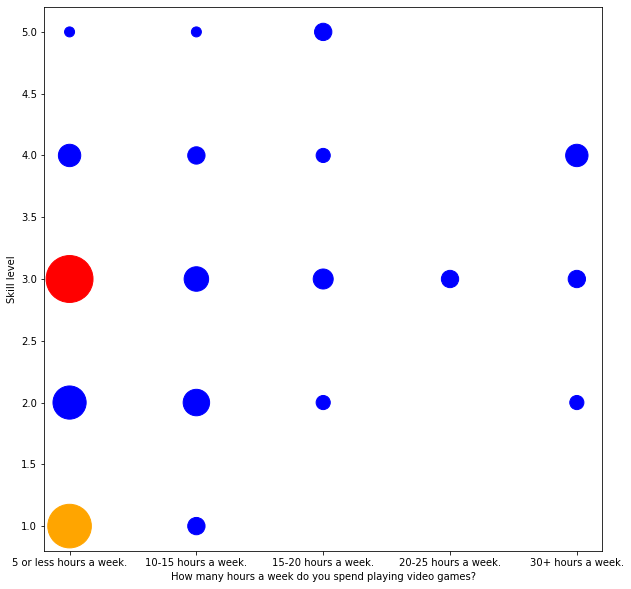

In [9]:
aggregated_data3 = aggregate_data_for_scatter_plot("How many hours a week do you spend playing video games?", "Skill level")
axis = aggregated_data3.plot.scatter(0, 1, aggregated_data3["amount"] * 100, aggregated_data3["colors"], figsize = (10, 10))

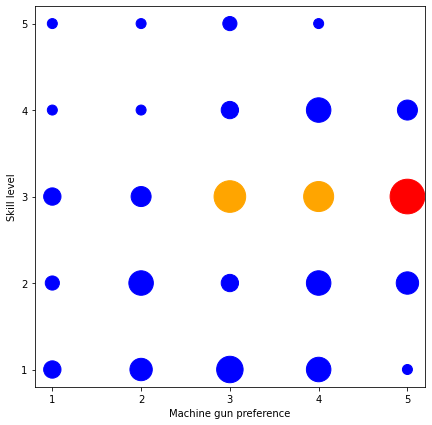

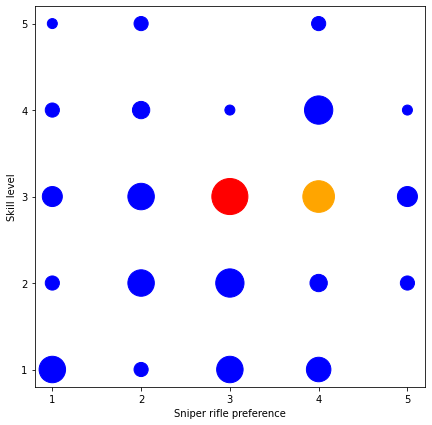

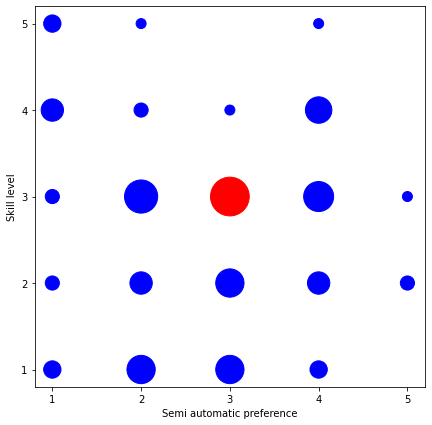

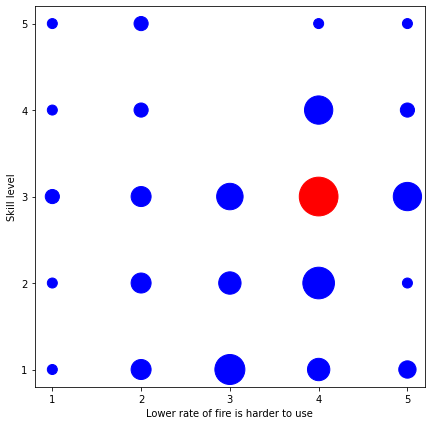

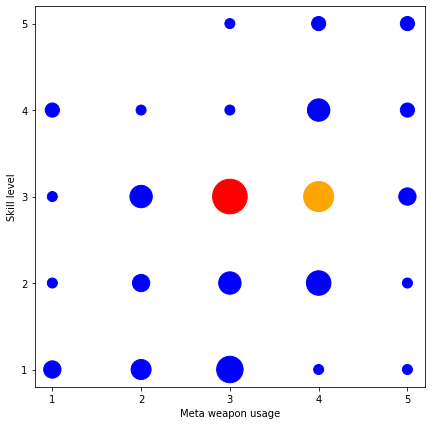

In [10]:
for x_axis in ["Machine gun preference", "Sniper rifle preference", "Semi automatic preference", "Lower rate of fire is harder to use", "Meta weapon usage"]:
    aggregated_data3 = aggregate_data_for_scatter_plot(x_axis, "Skill level")
    amounts = aggregated_data3["amount"]
        
    axis = aggregated_data3.plot.scatter(0, 1, amounts * 100, aggregated_data3["colors"], figsize = (7, 7))
    axis.set_yticks([1, 2, 3, 4, 5])
    axis.set_xticks([1, 2, 3, 4, 5])